In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplot2tikz

In [23]:
data = pd.read_csv('../log/20250521_ms_2.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data['pi'] = '0.3'

data2 = pd.read_csv('../log/20250530.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data2['pi'] = data2.dataset.apply(lambda x: x.split('_')[-2])
data2['dataset'] = data2.dataset.apply(lambda x: x.split('_')[0])
data2.replace({'concrete':'concrete_strength'},inplace = True)
data = pd.concat((data, data2))

data2 = pd.read_csv('../log/20250522.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data2['variant'] = 'only_inflate'
data2['pi'] = 1
 
data2 = data2[data2['generation'] <= 1000]
data = pd.concat((data, data2))
data = data[data['generation'] <= 1000]

In [24]:
data2.tail()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,variant,pi
132280,concrete_strength,6.153161,6.593482,30363,752,4,4,996,0.182239,only_inflate,1
132281,concrete_strength,6.153161,6.593482,30363,752,4,4,997,0.172582,only_inflate,1
132282,concrete_strength,6.153105,6.608086,30443,754,4,4,998,0.179602,only_inflate,1
132283,concrete_strength,6.153105,6.608086,30443,754,4,4,999,0.181916,only_inflate,1
132284,concrete_strength,6.153046,6.607725,30523,756,4,4,1000,0.178384,only_inflate,1


In [25]:
data.head()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,pi,variant
0,bioav,32.627193,36.258366,1146,1,4,5,0,305.242281,0.3,NaN
1,bioav,32.627193,36.258366,1146,1,4,5,1,0.065056,0.3,NaN
2,bioav,32.390675,34.005520,783,2,4,5,2,0.051694,0.3,NaN
3,bioav,32.390675,34.005520,783,2,4,5,3,0.060445,0.3,NaN
4,bioav,32.224144,33.589134,1057,3,4,5,4,0.048921,0.3,NaN


In [26]:
baseline_final = pd.read_csv('../log/baseline_20250526.csv', names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [27]:
baseline_evo =  pd.read_csv('../log/baseline_evo_20250526.csv', names = ['dataset', 'train_fitness', 'val_fitness', 'test_fitness', 'seed','epoch', 'timing'])
baseline_evo.dropna(axis = 0, inplace = True)

In [28]:
colors = ['#FF0000', '#0000FF', '#008000', '#800080']
light_colors = ['#F08080', '#87CEFA', '#90EE90', '#DDA0DD']

In [29]:
pis = data.pi.unique()
datas = data.dataset.unique()

In [30]:
baseline_final.head()

,dataset,test_fitness,seed,epoch,timing
0,bioav,68.954971,8,1000,663.274803
1,bioav,30.779556,9,1000,665.926589
2,bioav,28.992313,6,1000,668.576831
3,bioav,28.697771,2,1000,684.833575
4,bioav,67.865662,5,1000,687.051019


In [31]:
limits = {'bioav' : (10,40), 'ld50' : (1750, 2550), 'concrete_strength' : (4, 18), 'airfoil' : (3, 10)}

% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{green}{RGB}{0,128,0}
\definecolor{lightcoral}{RGB}{240,128,128}
\definecolor{lightgreen}{RGB}{144,238,144}
\definecolor{lightskyblue}{RGB}{135,206,250}
\definecolor{plum}{RGB}{221,160,221}
\definecolor{purple}{RGB}{128,0,128}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xlabel={Generation},
xmin=-49.95, xmax=1048.95,
xtick style={color=black},
y grid style={darkgray176},
ylabel={RMSE},
ymin=10, ymax=40,
ytick style={color=black}
]
\addplot [semithick, red]
table {%
0 30.7764854431152
3 30.7457056045532
6 30.6440696716309
9 30.4752635955811
12 30.4718561172485
15 30.3409776687622
18 30.2763833999634
21 30.1968441009521
24 30.1582727432251
27 30.1421680450439
30 30.044472694397
33 29.9811334609985
36 29.9106664657593
39 29.8630638122559
42 29.8020277023315
45 29.

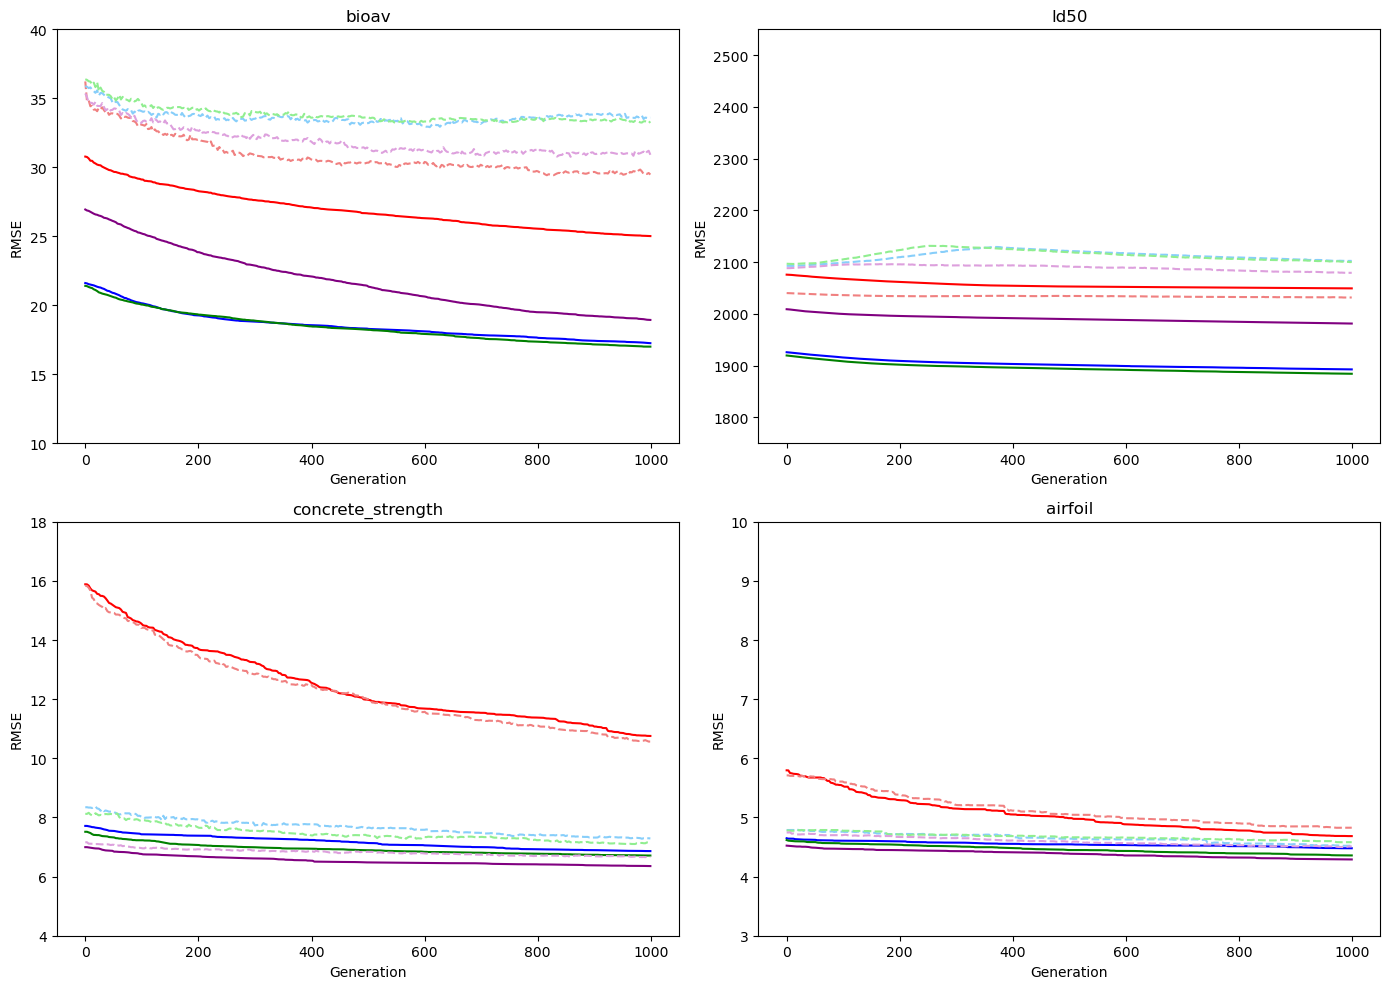

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # flatten for easy indexing

for idx, dataset in enumerate(datas):
    ax = axes[idx]

    for i, pi in enumerate(pis):
        grouped = data[(data['dataset'] == dataset) & (data['pi'] == pi)][
            ['train_fitness', 'test_fitness', 'generation']].groupby('generation').median()

        grouped = grouped.query("generation%3 == 0")
        
        ax.plot(grouped.index, grouped.train_fitness, label=f'{pi} train', color=colors[i])
        ax.plot(grouped.index, grouped.test_fitness, color=light_colors[i], linestyle='dashed', label=f'{pi} test')

    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    # ax.axhline(y=baseline, color='black', linestyle='dotted', label='NN baseline')

    ax.set_ylim(limits[dataset])
    ax.set_title(dataset)
    ax.set_xlabel('Generation')
    ax.set_ylabel('RMSE')
    # ax.legend(fontsize='small')

plt.tight_layout()
# plt.show()

print(matplot2tikz.get_tikz_code())



% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{green}{RGB}{0,128,0}
\definecolor{purple}{RGB}{128,0,128}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xlabel={Generation},
xmin=-49.95, xmax=1048.95,
xtick style={color=black},
y grid style={darkgray176},
ylabel={Parameters},
ymin=-9682.275, ymax=251716.775,
ytick style={color=black}
]
\addplot [semithick, red]
table {%
0 2199.5
3 2432.5
6 2604
9 3058
12 3548
15 4013
18 4018.5
21 4338.5
24 4609.5
27 4744
30 4984
33 5120.5
36 5396
39 5731
42 6005.5
45 6220
48 6086
51 7183
54 7455.5
57 7594.5
60 7873
63 8276
66 8276
69 8836
72 9111.5
75 9387
78 9504.5
81 9799
84 10074.5
87 10230.5
90 10774.5
93 11183
96 11454.5
99 11866.5
102 12188.5
105 12420
108 12732.5
111 13007
114 13417
117 13823.5
120 14160
123 14232.5
126 14574
129 14777.5
132 15121
135 15535
138 15810
14

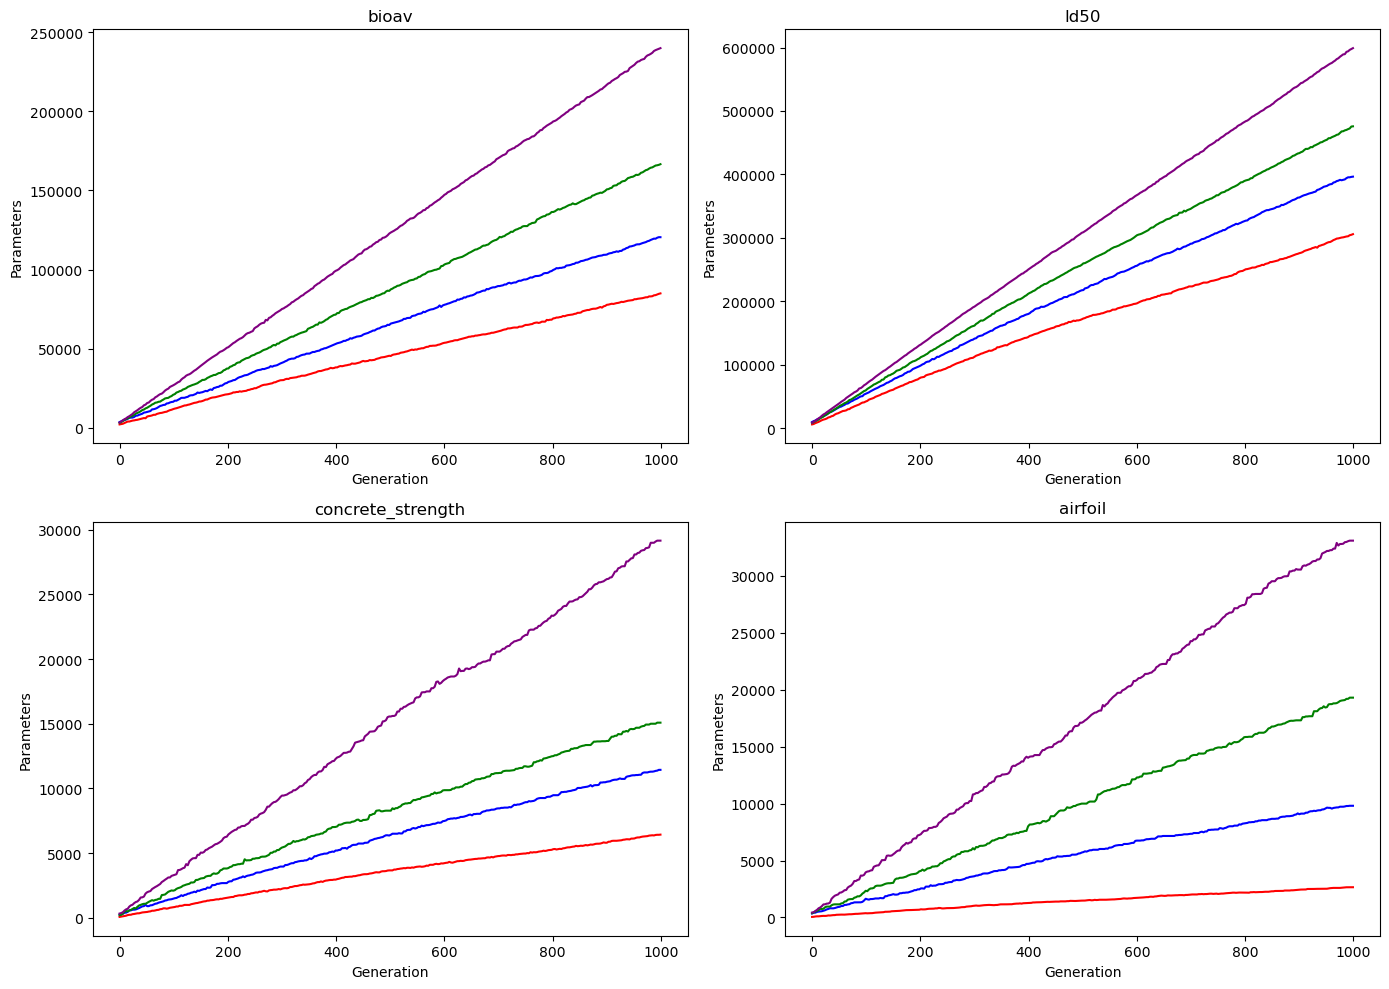

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots
axes = axes.flatten()  # flatten to iterate easily

for idx, dataset in enumerate(datas):
    ax = axes[idx]

    for i, pi in enumerate(pis):
        grouped = data[(data['dataset'] == dataset) & (data['pi'] == pi)][
            ['parameters', 'generation']].groupby('generation').median()

        grouped = grouped.query("generation%3 == 0")
        grouped = grouped.query("generation%3 == 0")
        
        ax.plot(grouped.index, grouped.parameters, label=pi, color=colors[i])

    ax.set_title(dataset)
    ax.set_xlabel('Generation')
    ax.set_ylabel('Parameters')
    # ax.legend(fontsize='small')

plt.tight_layout()
# plt.show()
print(matplot2tikz.get_tikz_code())


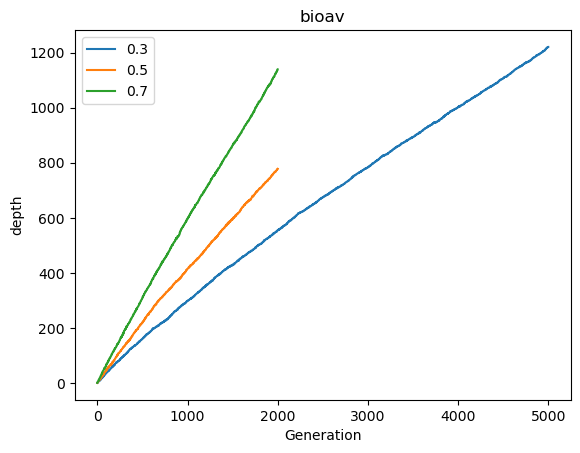

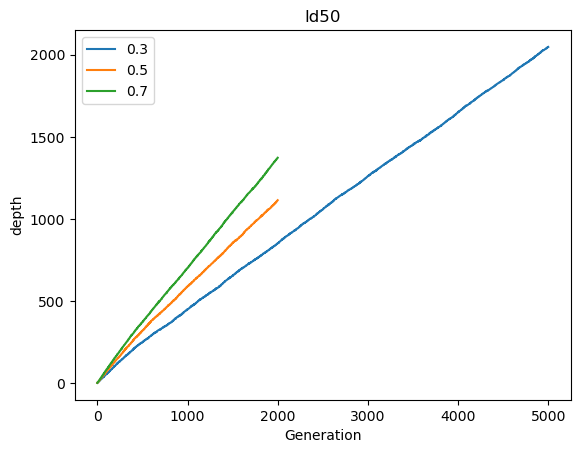

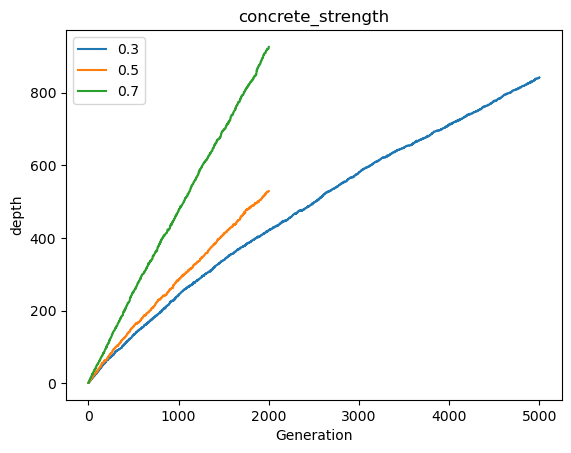

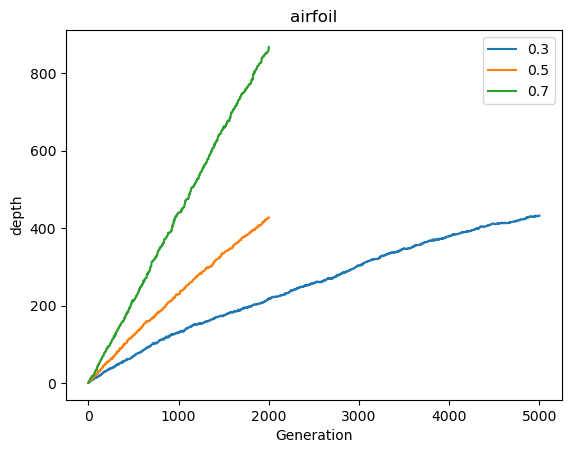

In [49]:
for dataset in datas:
    for i, pi in enumerate(pis):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['pi'] == pi)][
                        ['depth', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.depth, label = pi)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('depth')
    plt.legend()
    plt.show()

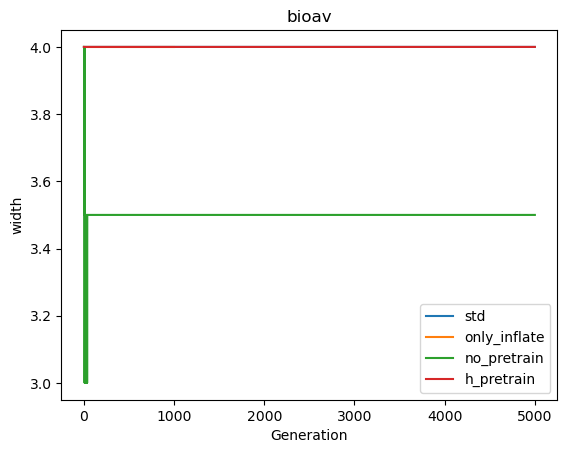

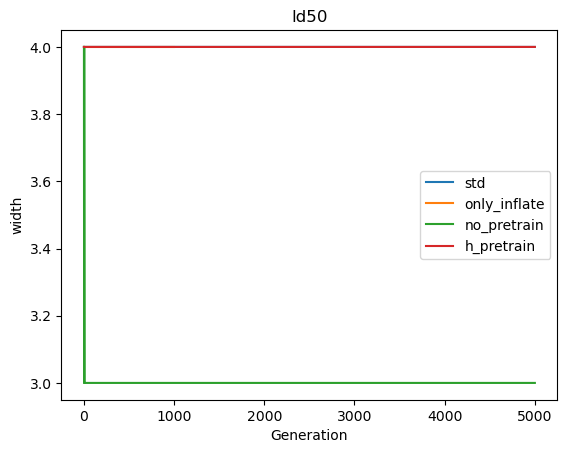

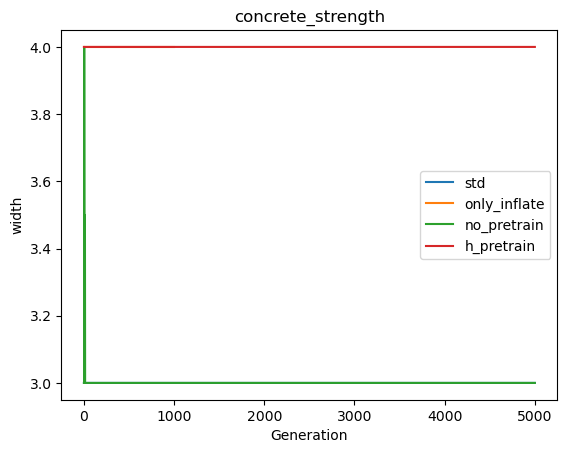

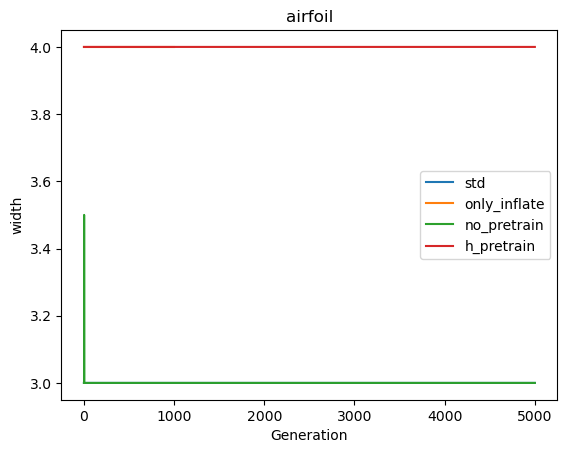

In [15]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['width', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.width, label = var)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('width')
    plt.legend()
    plt.show()

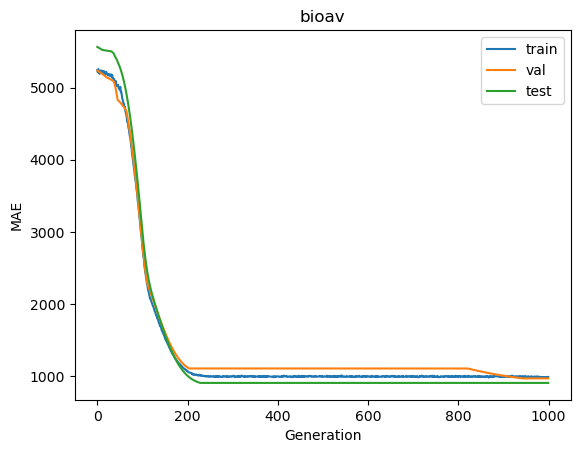

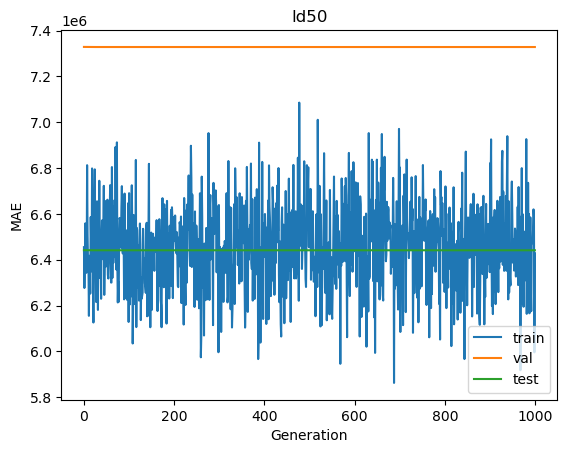

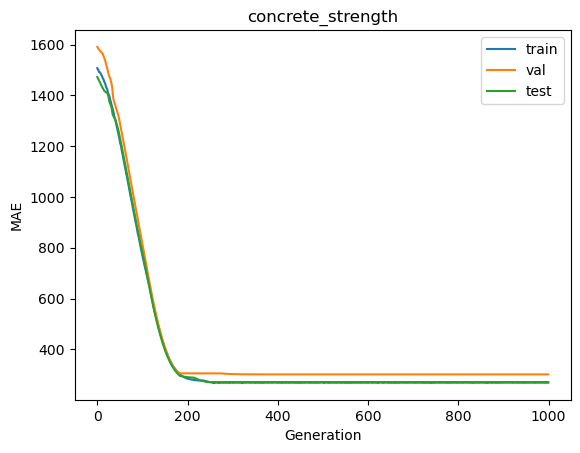

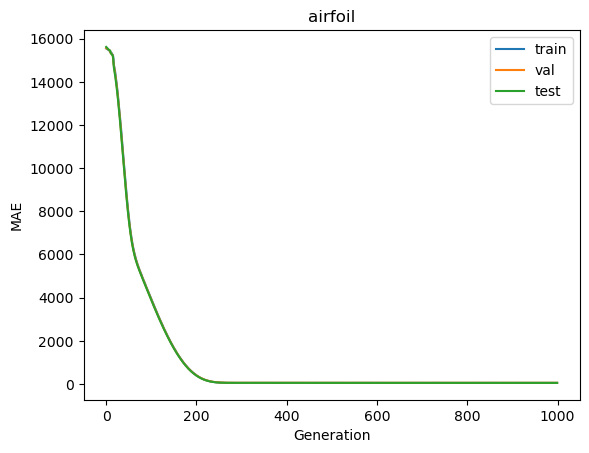

In [16]:
for dataset in datas:
        
    grouped = baseline_evo[(baseline_evo['dataset'] == dataset)][
                    ['train_fitness', 'val_fitness', 'test_fitness', 'epoch']].groupby('epoch').median()
    
    plt.plot(grouped.index, grouped.train_fitness, label = 'train')
    plt.plot(grouped.index, grouped.val_fitness, label = 'val') # label = 'test',
    plt.plot(grouped.index, grouped.test_fitness, label = 'test')


    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    
    # plt.plot([i for i in range(5000)], [baseline for _ in range(5000)], color = 'black', linestyle = 'dotted', label = 'NN baseline')

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()